In [1]:
# 필요 라이브러리 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # 시각화 툴1
import seaborn as sns # 시각화 툴2

from scipy import stats # 피어슨, 스피어만 상관계수

from sklearn.datasets import load_boston # 사용할 예제 데이터

# 선형 상관 예제: <span style="background-color:#F1F8FF">MLB Baseball dataset</span>

In [2]:
# 분포 데이터셋 로딩
df = pd.read_csv('./baseball.csv')
df

,Salary,Bat_avg,OBP,Num_runs,Num_hits,Num_doubles,Num_triples,Num_hr,Num_RBI,Num_walks,Num_strikeouts,Num_steal,Num_errors,FA,FA_in_91,Arbit,Arbit_in_91,Player_name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,170,0.111,0.138,3,3,0,0,0,1,1,7,0,0,0,0,0,0,John Russell
333,160,0.264,0.318,24,48,7,0,1,22,15,18,0,7,0,0,0,0,Mario Diaz
334,142,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,Dean Palmer
335,140,0.264,0.270,24,74,16,0,3,27,5,42,0,10,0,0,0,0,Ivan Rodriguez


Description
 * <span style="background-color:#F1F8FF">Salary</span>: 연봉(단위: $'000)
 * <span style="background-color:#F1F8FF">Bat_avg</span>: 개인 시즌 타율
 * <span style="background-color:#F1F8FF">OBP</span>: 개인 시즌 출루율 (on-base percentage)
 * <span style="background-color:#F1F8FF">Num_runs</span>: 개인 시즌 득점 기록
 * <span style="background-color:#F1F8FF">Num_hits</span>: 개인 시즌 안타 기록
 * <span style="background-color:#F1F8FF">Num_doubles</span>: 개인 시즌 2루타 기록
 * <span style="background-color:#F1F8FF">Num_triples</span>: 개인 시즌 3루타 기록
 * <span style="background-color:#F1F8FF">Num_hr</span>: 개인 시즌 홈런 기록
 * <span style="background-color:#F1F8FF">Num_RBI</span>: 개인 시즌 타점
 * <span style="background-color:#F1F8FF">Num_walks</span>: 개인 시즌 볼넷 기록
 * <span style="background-color:#F1F8FF">Num_strikeouts</span>: 개인 시즌 삼진
 * <span style="background-color:#F1F8FF">Num_steal</span>: 개인 시즌 도루
 * <span style="background-color:#F1F8FF">Num_errors</span>: 개인 시즌 범실 개수
 * <span style="background-color:#F1F8FF">FA</span>: 시즌 FA 자격 유무(1 or 0)
 * <span style="background-color:#F1F8FF">FA_in_91	</span>: 전 시즌 FA 자격 유무(1 or 0)
 * <span style="background-color:#F1F8FF">Arbit</span>: 시즌 중재(arbitration)
 * <span style="background-color:#F1F8FF">Arbit_in_91</span>: 전 시즌 중재
 * <span style="background-color:#F1F8FF">Player_name</span>: 야구 선수 이름

## 산점도를 이용한 출루율(<span style="background-color:#F1F8FF">OBP</span>:)과 타율(<span style="background-color:#F1F8FF">Bat_avg</span>:) 관계 확인

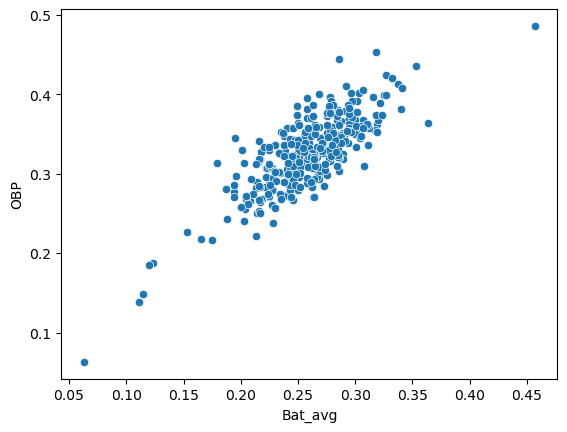

In [4]:
# 출루율을 나타내는 OBP와
# 타율을 나타내는 Bat_avg의 관계 확인

sns.scatterplot(x=df['Bat_avg'], y=df['OBP'])
plt.show()

강한 __선형 관계__ 에 있는 것으로 보입니다. <br>
하지만 __이상치__ 가 있는 경우 눈에 띄는 것이 특징 << 시각화의 장점

## 정규성 확인
sharpiro-wilk 검정을 통해 정규성을 확인<br><br>
귀무 가설($H_0$): 데이터가 정규 분포를 따름<br>
대립가설($H_1$): 데이터가 정규 분포를 따르지 않음

In [6]:
# 피어슨 상관계수 확인 전 정규성을 충족하는지 확인

print('타율의 정규성 shapiro test : ', stats.shapiro(df['Bat_avg']))
print('출루율의 정규성 shapiro test : ', stats.shapiro(df['OBP']))

타율의 정규성 shapiro test :  ShapiroResult(statistic=0.9471378922462463, pvalue=1.2650666070257444e-09)
출루율의 정규성 shapiro test :  ShapiroResult(statistic=0.9594728350639343, pvalue=4.848822499070593e-08)


두 변수 모두 __$p-value=0.000$__ -> 즉, 귀무가설을 기각하므로 두 변수 모두 정규성 만족 안함

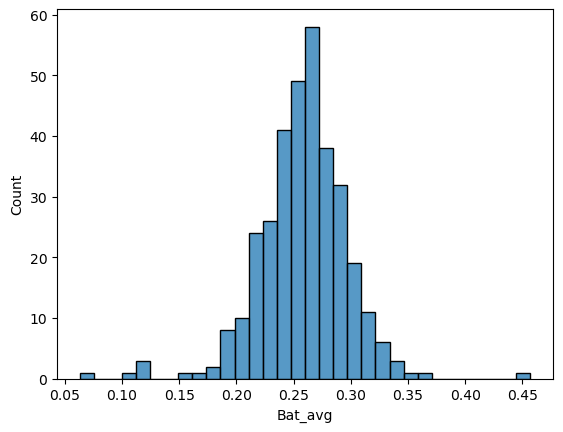

In [9]:
sns.histplot(df['Bat_avg'])
plt.show()

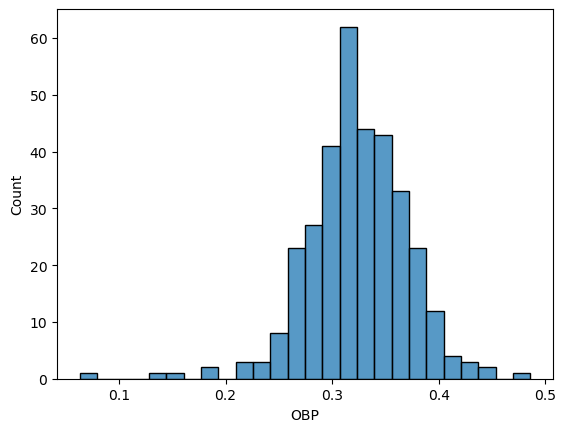

In [10]:
sns.histplot(df['OBP'])
plt.show()

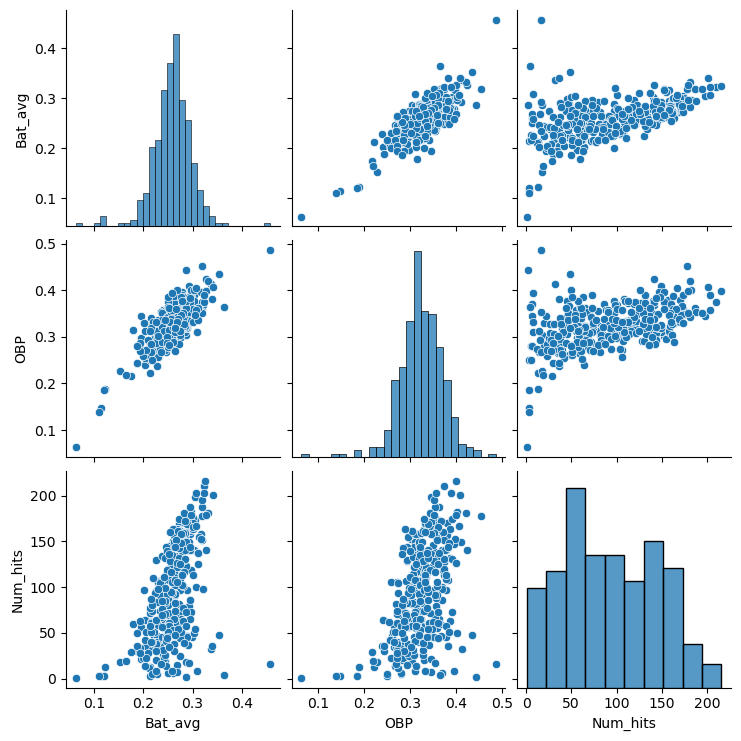

In [13]:
# 이상치 확인을 위해 단변량, 다변량 모두 보여주는 sns의 pairplot을 활용
# 타석의 수가 없으니 안타의 개수를 토대로 Bat_avg와 OBP를 확인

sns.pairplot(df[['Bat_avg', 'OBP', 'Num_hits']])
plt.show()

안타의 개수가 0~25 사이에 있지만, 타율과 출루율은 0.4를 넘기는 경우도 있고, 0에 근접한 데이터포인트도 존재하는 것을 확인<br><br>
이상치 제거 필요<br><br>
여기서는 안타 50개 이상을 친 플레이어로 제한하여 상관 분석을 진행

## 이상치 제거

In [18]:
# 안타 50개 이상인 데이터만 추출하기
new_df = df.loc[df['Num_hits'] >= 50, : ].copy()
new_df #(258, 18)

,Salary,Bat_avg,OBP,Num_runs,Num_hits,Num_doubles,Num_triples,Num_hr,Num_RBI,Num_walks,Num_strikeouts,Num_steal,Num_errors,FA,FA_in_91,Arbit,Arbit_in_91,Player_name
0,3300,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0,Andre Dawson
1,2600,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0,Steve Buchele
2,2500,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0,Kal Daniels
3,2475,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0,Shawon Dunston
4,2313,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0,Mark Grace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,287,0.264,0.321,78,144,34,1,27,102,42,118,4,6,0,0,0,0,Juan Gonzalez
329,230,0.269,0.332,46,106,22,0,20,69,33,93,0,6,0,0,0,0,Kevin Reimer
331,183,0.213,0.312,36,57,8,3,2,26,39,32,8,15,0,0,0,0,Jeff Huson
334,142,0.187,0.281,38,50,9,2,15,37,32,98,0,9,0,0,0,0,Dean Palmer


In [19]:
print('안타 개수에 대한 조건 생성 전 데이터셋의 행의 개수: {}'.format(df.shape[0]))
print('안타 개수에 대한 조건 생성 후 데이터셋의 행의 개수: {}'.format(new_df.shape[0]))

안타 개수에 대한 조건 생성 전 데이터셋의 행의 개수: 337
안타 개수에 대한 조건 생성 후 데이터셋의 행의 개수: 258


## 정규성 재검정

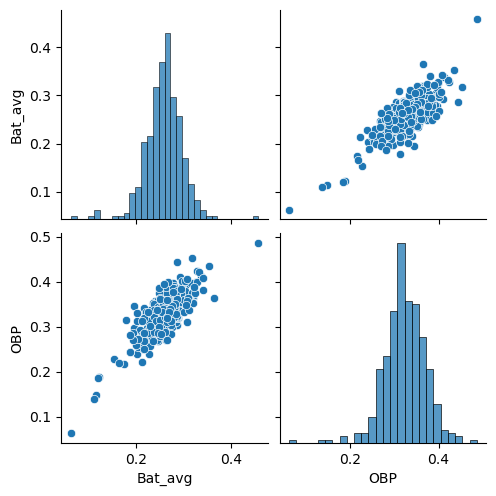

In [21]:
# pairplot으로 단변량, 다변량 확인
sns.pairplot(df[['Bat_avg', 'OBP']])
plt.show()

In [22]:
print('이상치 제거후 타율 shapiro 검정량 : ', stats.shapiro(new_df['Bat_avg']))
print('이상치 제거후 출루율 shapiro 검정량 : ', stats.shapiro(new_df['OBP']))

이상치 제거후 타율 shapiro 검정량 :  ShapiroResult(statistic=0.9955654144287109, pvalue=0.6710947751998901)
이상치 제거후 출루율 shapiro 검정량 :  ShapiroResult(statistic=0.9948960542678833, pvalue=0.5459209680557251)


귀무 가설 기각 실패 -> 정규성 충족

## 피어슨 상관계수 산출
$H_0$: 타율과 출루율은 관계가 없다.<br>
$H_1$: 타율과 출루율은 관계가 있다.

In [23]:
# pearson correlation은 scipy의 pearsonr 함수 이용

stats.pearsonr(new_df['Bat_avg'], new_df['OBP'])

PearsonRResult(statistic=0.6980704191688558, pvalue=5.1760372574837047e-39)

In [25]:
print('타율과 출루율의 피어슨 상관계수 : {: .3f}'.format(stats.pearsonr(new_df['Bat_avg'], new_df['OBP'])[0]))
print('타율과 출루율의 피어슨 상관계수 p-value : {: .3f}'.format(stats.shapiro(new_df['OBP'])[1]))

타율과 출루율의 피어슨 상관계수 :  0.698
타율과 출루율의 피어슨 상관계수 p-value :  0.546


# 비선형 순위 상관

In [26]:
# 보스턴 집값 데이터 로딩
from sklearn.datasets import load_boston

In [29]:
import warnings
warnings.filterwarnings('ignore')
# 보스턴 데이터셋 로딩
boston = load_boston()

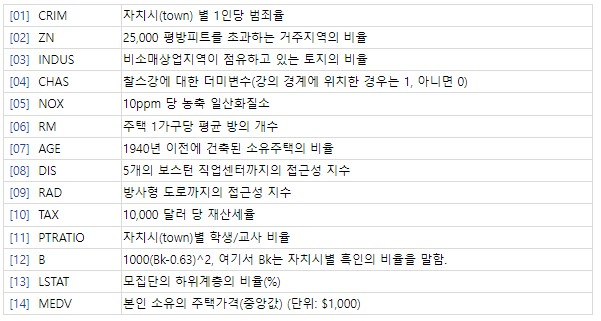

In [30]:
from IPython.display import Image
Image("C:/Users/qctum/boston_columns.jpg")

In [31]:
type(boston) # sklearn.utils._bunch.Bunch

sklearn.utils._bunch.Bunch

Bunch라는 자료구조를 활용, __key-value__ 형식으로 구성되어 있으며, 사전(Dictionary)과 비슷한 구조를 갖고 있는 것이 특징

In [34]:
# boston의 키 확인
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [35]:
# boton 데이터셋의 description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 분석을 위한 데이터프레임 구성

In [36]:
# boston 데이터셋은 data와 target의 키에 레코드에 대한 데이터가 담겨있다.
X = boston.data
boston_df = pd.DataFrame(X, columns=boston.feature_names)
display(boston_df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
# 특정 지역의 집값 중앙값까지 데이터프레임에 추가
boston_df['MEDV'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 특정 지역 하위계층의 비율을 나타내는 <span style="background-color:#F1F8FF">LSTAT</span>와 해당 지역 집값(중앙값)을 나타내는 <span style="background-color:#F1F8FF">MEDV</span> 관계 확인

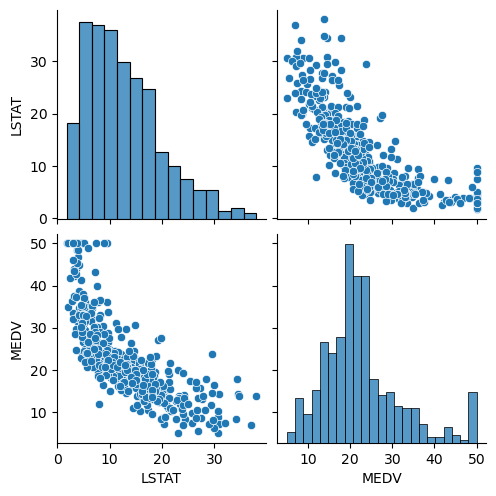

In [39]:
# pairplot을 통한 단변량, 다변량 관계 확인
sns.pairplot(boston_df[['LSTAT', 'MEDV']])
plt.show()

 * 산점도: 비선형 관계 포착
 * 히스토그램 정규분포와는 거리가 멀어보임 -> 이상치 제거로도 선형성 확보가 어려워보임

해결방안:<br>
    1. log 변환<br>
    2. (비모수) 스피어맨 순위 상관분석 실시

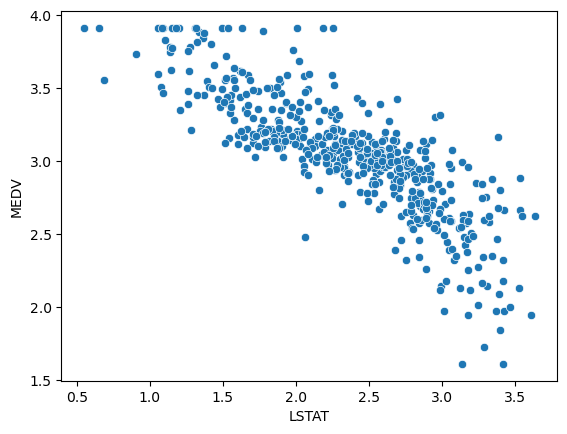

In [42]:
# 로그 변환으로 선형화 후 산점도 확인
sns.scatterplot(x=np.log(boston_df['LSTAT']), y=np.log(boston_df['MEDV']))
plt.show()

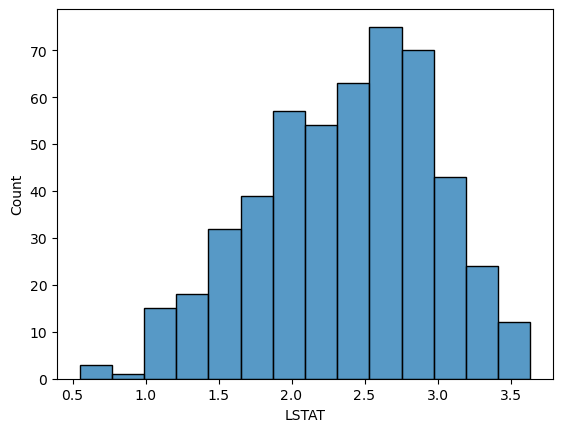

In [43]:
# 로그 변환 후 LSTAT 분포 확인
sns.histplot(np.log(boston_df['LSTAT']))
plt.show()

In [44]:
stats.shapiro(np.log(boston_df['LSTAT'])) # 정규성 가정 만족 실패

ShapiroResult(statistic=0.9861650466918945, pvalue=9.793916979106143e-05)

## 비선형 순위 상관 스피어맨

In [45]:
# scipy의 spearmanr 함수 이용
stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])

SignificanceResult(statistic=-0.8529141394922163, pvalue=2.221727524313283e-144)

In [48]:
spearman = stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])
print('스피어맨 상관계수 : {: .4f}'.format(spearman[0]))
print('유의확률(p-value) : {: .4f}'.format(spearman[1]))

스피어맨 상관계수 : -0.8529
유의확률(p-value) :  0.0000


In [49]:
# 정규성 가정을 충족하진 못하지만, 결과 비교를 위해 상관분석 진행
stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])
print('스피어맨 상관계수 : {: .4f}'.format(stats.pearsonr(boston_df['LSTAT'], boston_df['MEDV'])[0]))
print('유의확률(p-value) : {: .4f}'.format(stats.pearsonr(boston_df['LSTAT'], boston_df['MEDV'])[1]))

스피어맨 상관계수 : -0.7377
유의확률(p-value) :  0.0000


In [50]:
print('스피어맨 상관계수 : {: .4f}'.format(stats.spearmanr(boston_df['LSTAT'], boston_df['MEDV'])[0]))
print('피어슨 상관계수 : {: .4f}'.format(stats.pearsonr(boston_df['LSTAT'], boston_df['MEDV'])[0]))

스피어맨 상관계수 : -0.8529
피어슨 상관계수 : -0.7377


분포를 고려했을 때 스피어맨 상관계수가 순위를 고려하여 피어슨에 비해 더 적합한 상관성을 제시하고 있음